# ANALYSIS

### import all libraries and read in the cleaned dataset

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('clean_dataframe.csv')

# IMMIGRATION AND EMMIGRATION ANALYSES

## Immigrants are going to be deduced by the number of single visitors and lodgers in the town

In [2]:
# immigrants are the single lodgers and visitors
immigrants = data[
    (data['Marital Status']=='Single') 
    &
    ((data['Relationship to Head of House']=='Visitor') | (data['Relationship to Head of House']=='Lodger'))
     ]

#calculate immigration rate per ten thousand as number of immigrants per the total population
immigration_rate = np.floor(len(immigrants)/len(data.index) *1000)
immigration_rate

26.0

### The immigration rate is 26 per  thousand

## Emmigrants will be deduced by finding the difference between the number of male divorcees and female divorcees in the town who are lodgers or visitors

In [3]:
#female divorcees 
female = data[
     ( (data['Marital Status']=='Divorced') & (data['Gender']=='Female') )
            ]
# male divorcees
male = data[
    ( (data['Marital Status']=='Divorced') & (data['Gender']=='Male') )
    ]
# calculate total population as lodgers or visitors who are divorced
emmigrant_total_pop = data.index
# find the difference between male and female divorcees
emmigrants  =  len(female)-len(male)

#emmigration rate per  thousand as number of emmigrants per the total population
emmigration_rate = np.floor(emmigrants/len(emmigrant_total_pop)* 1000)
emmigration_rate

20.0

### the emmigration rate is 20 per thousand people

## The immigration rate is higher than the emmigration rate so we can say the population is growing. but to get a more accurate idea of the population rate we have to calculate the birth and death rates

# Birth Rate

In [4]:
# the total number of new born babies
babies = data[data['Age'] == 0]
birth_rate = np.floor((len(babies)/len(data.index))*1000)
birth_rate

9.0

### The birth rate is 9 births per thousand

### Next we'll check if there has been a change in the birth rate in the past 5 years

In [5]:
#number of children who were born 5 years ago who will be 4 years old now
four_kids = len(data[(data['Age'] ==4)])
#calculate birth rate as number of newborns per entire population
rate = np.floor((four_kids/len(data.index)) * 1000)
rate

14.0

### The birth rate five years ago was 14 births per thousand women, thus indicating that the birth rate has reduced in the past five years

# Death Rate

In [6]:
#list to hold age bands
age_bands = ['60-64','65-69','70-74','75-79','80-84','85-89','90-94','95 and above']
#create list to hold names of age band dataframes
bands = []
for x in age_bands:
    #check if the age band is correct
    if len(x)>5:
        #bind the age band to the list
        bands.append(len(data[ data.Age>=int(x[0:2])]))
    else:
        bands.append(len(data[( data.Age >=int(x[0:2]) )& (data.Age<=int(x[3:]) )]))
    
#calculate death rate
death_rate = 0
#loop through the age bands
for x in range( len(bands) ):
    #make sure its not out of bounds
    if x+1 < len(bands):
        #calculate the death rate as the addition of the difference between the age bands
        death_rate += bands[x]-bands[x+1]
#divide the death rate by 5 to acount for per annum
death_rate = np.floor(death_rate/5)
print(death_rate)

78.0


### the death rate per annum is 78 deaths per annum

### To get a more accurate representation of the growth of the population, we'll add the difference between the birth and death rates to the difference betweeen the immigration and emmigration rates

In [7]:
growth = (birth_rate-death_rate) + (immigration_rate-emmigration_rate)
growth

-63.0

### We can see that the population is shrinking at 63 people per thousand every year

# INFIRMITY AND SICKNESS

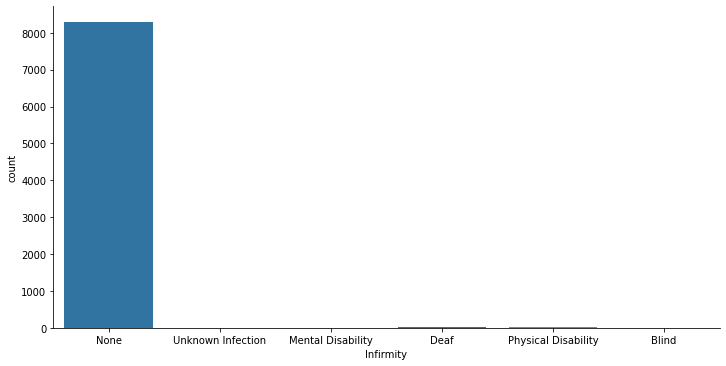

In [8]:
# We will make a plot to show the population's distribution based on infirmity
infirmity_plot = sns.catplot(data=data, kind="count",x='Infirmity',aspect=2)

### We see that there is a small population of infirmed citizens

# RELIGION

<AxesSubplot:xlabel='Religion', ylabel='Age'>

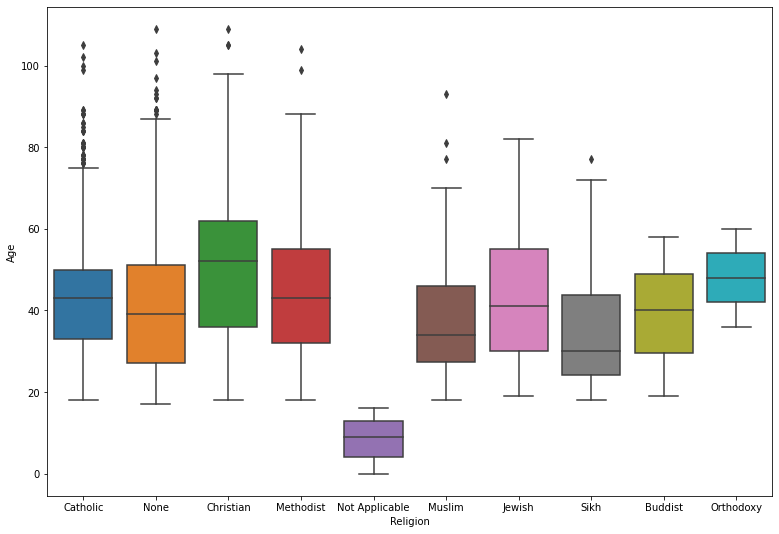

In [9]:
# PLot the religious distribution based on the citizens age
fig, ax = plt.subplots(figsize=(13,9))
sns.boxplot( data=data,ax =ax, x='Religion', y= 'Age')

### We see that there is a large population of christians who might benefit from a church

### We'll find the median age of each religion to determine which of them is rising

In [10]:
#bind religions to a variable
religions = data.Religion.unique()
# loop through religions and print their median age
print("Median Age per Religion\n")
for x in religions:
    religion_ = data[data.Religion==x]
    print(x, ": ", religion_.Age.median())

Median Age per Religion

Catholic :  43.0
None :  39.0
Christian :  52.0
Methodist :  43.0
Not Applicable :  9.0
Muslim :  34.0
Jewish :  41.0
Sikh :  30.0
Buddist :  40.0
Orthodoxy :  48.0


# MARITAL STATUS AND DIVORCE

### We will calculate the divorce rate to determine if there is a need for new housing

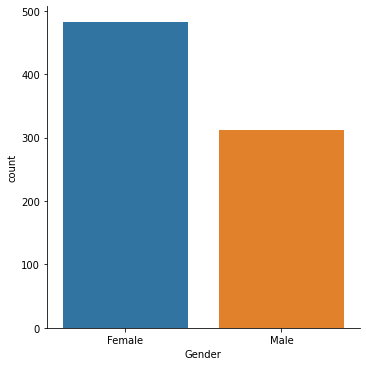

In [11]:
# collect all divorced citizens
divorced_ = data[data['Marital Status']=='Divorced']
#create a count plot to see divorce rates based on gender
divorce_plot = sns.catplot(data=divorced_,x='Gender', kind="count")

### reveals that there are more female divorcees than male divorcees, implying that male divorcees may depart town.

### Calculate divorce : marriage for the population

In [12]:
# obtain all married people
married_ = len(data[(data['Marital Status']=='Married')])
#divide the number of married people by 2 to get the number of married individuals
married_individuals = married_/2
# obtain a basic divorce count based on the divorced women in the population
divorced_count = data[ (data.Gender=='Female') &  (data['Marital Status']=='Divorced') ]
# calculate divorce : marriage
divorce_ratio = len(divorced_count)/len(data.index) * married_individuals

print(np.ceil(married_individuals))
print(np.ceil(divorce_ratio))

1177.0
68.0


### divorce:marriage = 68 divorces for every 1177 marriage

# POPULATION STATISTICS

Text(0.5, 1.0, 'Population Pyramid')

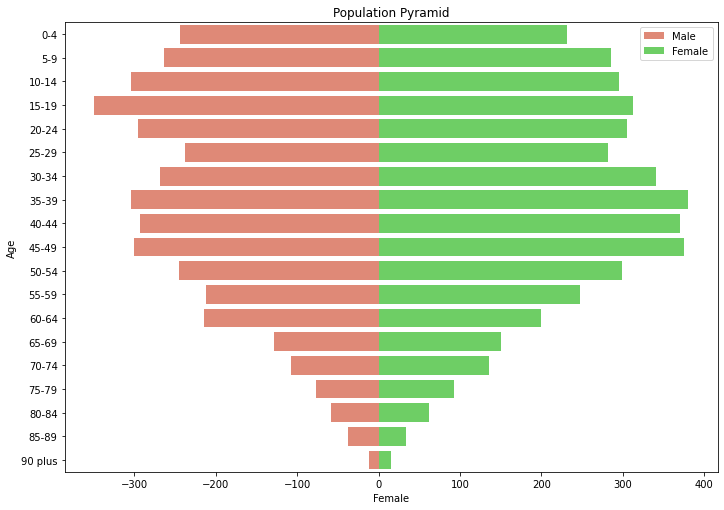

In [13]:
#create list to hold age bins
age_bands = ['0-4','5-9','10-14','15-19','20-24','25-29',
            '30-34','35-39','40-44','45-49','50-54','55-59','60-64',
            '65-69','70-74','75-79','80-84','85-89','90 plus']
#create list to hold names of bins
bins = []
for x in age_bands:
        if len(x) <5:
                bins.append(data[ ( data.Age >=int(x[0]) ) & (data.Age <=int(x[2]) ) ] )
        elif len(x) ==5:
                 bins.append(data[( data.Age >=int(x[0:2]) )& (data.Age <=int(x[3:]) )])
        else:
                bins.append(data[ data.Age >=int(x[0:2])])
                
                
#create lists to hold male and female entries
male = list()
female = list()
#loop through the list of bins and append the ages to male and female lists
for x in bins:
        female.append(len(x[x['Gender'] =='Female'].index))
        male.append(len(x[x['Gender'] =='Male'].index) * -1)
        
#make the dataframe we wil use to plot the population pyramid
pyramid_df = pd.DataFrame({'Age' : age_bands, 'Male': male, 'Female': female})
#plot the population pyramid
dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
pop_pyramid = sns.barplot(x='Male', y='Age', data=pyramid_df, order=age_bands,
color=('#F17E65'), label='Male',ax=ax)
pop_pyramid = sns.barplot(x='Female', y='Age', data=pyramid_df, order=age_bands,
color=('#60E053'), label='Female',ax=ax)
pop_pyramid.legend()
plt.title('Population Pyramid')

# COMMUTERS

### Commuters will include everyone who is a uni student (PhD or otherwise) and anyone whose job does not demand them to commute.

### First categorize all occupations into Employed, Unemployed, Student(Child), Uni Student, Retired

In [14]:
# function to categorize occupations in population
def cat_occupation(x):
    if 'student' in x.Occupation.lower() and x.Age>=16:
        return 'Uni Student'
    elif 'retired' in x.Occupation.lower():
        return 'Retired'
    if 'child' in x.Occupation.lower() and x.Age<= 15:
        return 'Student (Child)'
    elif 'unemployed' in x['Occupation'].lower():
        return 'Unemployed'
    else:
        return 'Employed'
#create new column and fill it with applied function
data['Occupation Category'] = data.apply (lambda x: cat_occupation(x), axis=1)

### First we'll pick sample of occupations from the data

In [15]:
# pick a sample size
occupations = data.Occupation.sample(n=800)

### Identify commuters

In [16]:
# create a list to hold occupations that require commuting
commuters = list()
# loop through the list of sample occupations
    #check the occupation for a list of keywords to determine if its a commuting occupation
for y in occupations.unique():
    if 'student' not in y.lower() and 'unemployed' not in y.lower() and 'retired' not in y.lower() and 'teacher' not in y.lower() and 'police' not in y.lower():
        commuters.append(y)
        
# create a count to track number of commuters
count = 0
# loop through commuters list
for x in commuters:
    value = len(data[data.Occupation== x])
    count +=value
    
# get uni students who are commuters
uni_students = data[ (data['Occupation Category'] =='Uni Student')]
# add the employed commuters to the uni students
all_commuters = len(uni_students) + count
# percentage of entire population that commute
commuters_total = (all_commuters/len(data.index))
#employed citizens
employed = data[ data['Occupation Category'] =='Employed' ]
#percentage of commuting working population
commuters_employed = (all_commuters/ len(employed) )
print(np.ceil(commuters_total *  100))
print(np.ceil(commuters_employed * 100))

45.0
66.0


### Approximately 45 percent of the total population commutes, while 65 percent of the working population commutes.

# OCCUPATION ANALYSIS

In [28]:
unemployed = data[data['Occupation Category'] =='Unemployed' ] 
working_age = data[ (data.Age>16)& (data.Age<65) ]
#percentage of unemployed working age population
unemployed_working_age = len(unemployed)/len(working_age) * 100
# percentage of unemployed population
all_unemployed= len(unemployed)/len(data.index) * 100
print(np.ceil( all_unemployed ) )
print(np.ceil( unemployed_working_age ) )
#plotting population's occupation based on age

6.0
9.0


### Plot employment statistics

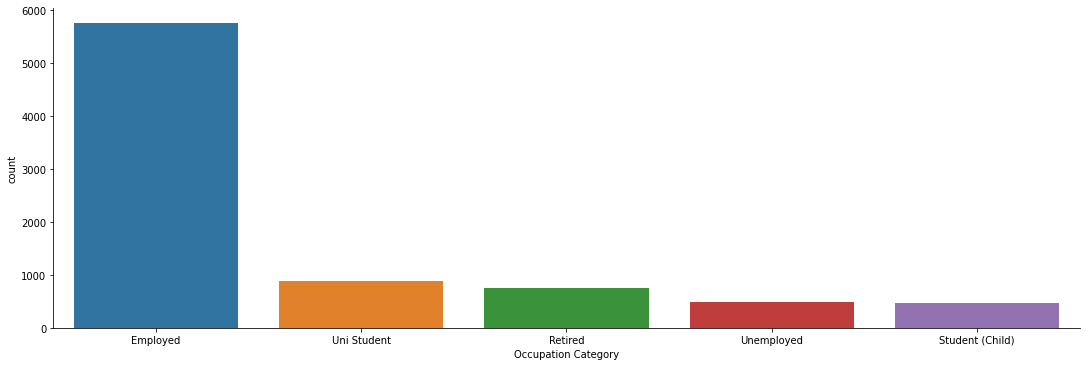

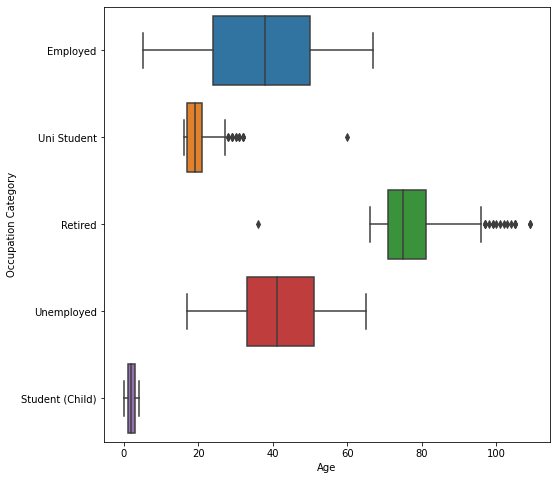

In [27]:
occupation_plot = sns.catplot(data=data,aspect = 3,x='Occupation Category', kind="count")
fig, ax = plt.subplots(figsize=(8,8))
occupation_by_age_ = sns.boxplot(data=data,ax=ax,x = 'Age', y ='Occupation Category')

### There seems to be an outlier in the retired category

In [22]:
data[(data['Occupation Category']=='Retired') & (data.Age < 60)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
996,4,Fletcher Viaduct,Barry,Barrett,36,Husband,Married,Male,Retired Chief Technology Officer,None,None,Retired


### This particular person retired early

# HOUSING AND OCCUPANCY

In [33]:
# create list to hold the number of residents in each house
occupants_list = []
# create variables to hold the unique values in  house number and street
streets = data.Street.unique()
numbers = data['House Number'].unique()
#loop through each unique street
for i in streets:
    # loop through each house number on the street
    for j in numbers:
        # count the number of occupants for each house number in each street
        occupants = len( data[ (data['House Number'] == j) & (data.Street == i)] )
        # check if the street has a house with the right number
        if occupants != 0:
            #add the number of occupants to the list
            occupants_list.append(occupants)
            
# get the mode occupancy rate
occupancy_mode= pd.Series(occupants_list).mode()[0]
# print(occupants_list)
#count to track overcrowded homes
total = 0
for x in occupants_list:
    #check if occupants is less than the occupancy mode
    if occupancy_mode - x < 0:
        #add one to the total
        total +=1
print(len(occupants_list))
print(total)

1
2997
2188


### there are 2188 overcrowded houses out of 2997